In [1]:
!conda install datasets

^C


In [5]:
from datasets import load_dataset

dataset = load_dataset("readerbench/AlephNews")

Repo card metadata block was not found. Setting CardData to empty.


In [2]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['title', 'summary', 'url', 'paragraphs'],
        num_rows: 38683
    })
    validation: Dataset({
        features: ['title', 'summary', 'url', 'paragraphs'],
        num_rows: 2036
    })
    test: Dataset({
        features: ['title', 'summary', 'url', 'paragraphs'],
        num_rows: 2143
    })
})


In [2]:

print("Title:", dataset['train'][0]['title'])
print("Summary:", dataset['train'][0]['summary'])
print("URL:", dataset['train'][0]['url'])
print("Paragraphs:", dataset['train'][0]['paragraphs'])


Title: Ion Cristoiu: Drama din amor, mai tare decât adoptarea Constituţiei.
Summary: ['Ion Cristoiu: În anii 1923-1924, numita Anny Bally din Brăila, "de o frumuseţe rară“, a încercat să se sinucidă din dragoste. În 8 noiembrie 1924, tot din amor, şi-a împuşcat iubitul, după care s-a împuşcat şi ea.', 'Ion Cristoiu: În tot acest timp, Adunarea Deputaţilor a votat o nouă Constituţie (în 26 noiembrie 1923), considerată "nulă" de către Opoziţie; Guvernul liberal Ionel Brătianu a adoptat Pachetul de legi economice, prin care se înfăptuia Programul Prin noi înşine!', 'Ion Cristoiu: Nici unul dintre aceste evenimente, rămase în Istoria Patriei, n-o interesează pe domnişoara Anny, nebună de durere c-a lăsat-o numitul Militeanu, funcţionar din Comerţ. Şi nici pe cititorii celor două mari ziare, Dimineaţa şi Universul ( despărţite de politică, dar unite de suferinţele domnişoarei Anny).']
URL: https://alephnews.ro/guvern/ion-cristoiu-drama-din-amor-mai-tare-decat-adoptarea-constitutiei/
Paragra

In [5]:
!pip uninstall transformers

^C


In [6]:
!pip install transformers

  Using cached transformers-4.40.0-py3-none-any.whl.metadata (137 kB)
Using cached transformers-4.40.0-py3-none-any.whl (9.0 MB)
   ---------------------------------------- 0.0/287.3 kB ? eta -:--:--
   -- ------------------------------------ 20.5/287.3 kB 640.0 kB/s eta 0:00:01
   ----------------------------- ---------- 215.0/287.3 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 287.3/287.3 kB 3.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------- -------------------------- 0.8/2.2 MB 15.9 MB/s eta 0:00:01
   ----------------------------- ---------- 1.6/2.2 MB 17.3 MB/s eta 0:00:01
   ---------------------------------------  2.2/2.2 MB 15.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 15.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip3 install torch torchvision torchaudio


   ---------------------------------------- 0.0/198.6 MB ? eta -:--:--
   ---------------------------------------- 0.2/198.6 MB 5.9 MB/s eta 0:00:34
   ---------------------------------------- 0.7/198.6 MB 8.7 MB/s eta 0:00:23
   ---------------------------------------- 1.3/198.6 MB 10.5 MB/s eta 0:00:19
   ---------------------------------------- 2.0/198.6 MB 11.9 MB/s eta 0:00:17
    --------------------------------------- 2.8/198.6 MB 13.8 MB/s eta 0:00:15
    --------------------------------------- 3.6/198.6 MB 14.3 MB/s eta 0:00:14
    --------------------------------------- 4.6/198.6 MB 15.4 MB/s eta 0:00:13
   - -------------------------------------- 5.6/198.6 MB 16.3 MB/s eta 0:00:12
   - -------------------------------------- 6.3/198.6 MB 16.8 MB/s eta 0:00:12
   - -------------------------------------- 7.3/198.6 MB 16.7 MB/s eta 0:00:12
   - -------------------------------------- 8.2/198.6 MB 16.9 MB/s eta 0:00:12
   - -------------------------------------- 9.2/198.6 MB 17.3 


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import torch
print(torch.__version__)


2.2.2


In [7]:
print(len(dataset))

3


In [2]:
from transformers import BartTokenizer

tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")

def preprocess_function(examples):
    # Concatenate paragraphs into one string if it's a list of strings
    inputs = [' '.join(paragraphs) if isinstance(paragraphs, list) else paragraphs for paragraphs in examples['paragraphs']]
    
    # Also concatenate summaries into one string if it's a list of strings
    summaries = [' '.join(summary) if isinstance(summary, list) else summary for summary in examples['summary']]

    # Tokenize inputs and labels without specifying return_tensors to keep output in native list/dictionary format
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True, padding="max_length")
    labels = tokenizer(summaries, max_length=128, truncation=True, padding="max_length")

    model_inputs['labels'] = labels['input_ids']
    return model_inputs



dataset = dataset.map(preprocess_function, batched=True)


In [9]:
print(dataset['train'])

Dataset({
    features: ['title', 'summary', 'url', 'paragraphs', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 38683
})


In [3]:
# function to remove title and url from the dataset

def remove_title_url(example):
    del example['title']
    del example['url']
    return example

dataset = dataset.map(remove_title_url)

In [11]:
print(dataset['train'])

Dataset({
    features: ['summary', 'paragraphs', 'input_ids', 'attention_mask', 'labels'],
    num_rows: 38683
})


In [23]:
!pip install accelerate -U



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install transformers[torch]
!pip install accelerate -U

In [4]:
from transformers import BartForConditionalGeneration, Trainer, TrainingArguments

# model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

training_args = TrainingArguments(
    output_dir="./results_large",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=2,  
    gradient_accumulation_steps=2, 
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    fp16=True
)


train_subset = dataset['train'].select(range(1000))  # Example: select first 1000 samples
validation_subset = dataset['validation'].select(range(500))

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_subset,
    eval_dataset=validation_subset
)

trainer.train()

model_path = "./bart_model_large"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)


c:\Users\RoG\anaconda3\envs\pythonRL\lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(
  0%|          | 0/750 [00:00<?, ?it/s]c:\Users\RoG\anaconda3\envs\pythonRL\lib\site-packages\transformers\models\bart\modeling_bart.py:590: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(
                                                   
 33%|███▎      | 250/750 [58:30<1:45:43, 12.69s/it]

{'eval_loss': 0.9561969041824341, 'eval_runtime': 335.4326, 'eval_samples_per_second': 1.491, 'eval_steps_per_second': 0.745, 'epoch': 1.0}


 67%|██████▋   | 500/750 [1:51:20<52:51, 12.69s/it]  Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'loss': 1.1853, 'learning_rate': 6.720000000000001e-06, 'epoch': 2.0}


                                                   
 67%|██████▋   | 500/750 [1:57:01<52:51, 12.69s/it]

{'eval_loss': 0.9243336319923401, 'eval_runtime': 334.1019, 'eval_samples_per_second': 1.497, 'eval_steps_per_second': 0.748, 'epoch': 2.0}


                                                      
100%|██████████| 750/750 [2:55:24<00:00, 14.03s/it]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 0.9325523972511292, 'eval_runtime': 335.1293, 'eval_samples_per_second': 1.492, 'eval_steps_per_second': 0.746, 'epoch': 3.0}
{'train_runtime': 10524.3314, 'train_samples_per_second': 0.285, 'train_steps_per_second': 0.071, 'train_loss': 1.0742976684570313, 'epoch': 3.0}


('./bart_model_large\\tokenizer_config.json',
 './bart_model_large\\special_tokens_map.json',
 './bart_model_large\\vocab.json',
 './bart_model_large\\merges.txt',
 './bart_model_large\\added_tokens.json')

In [17]:
model_path = "./bart_model_large"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


('./bart_model\\tokenizer_config.json',
 './bart_model\\special_tokens_map.json',
 './bart_model\\vocab.json',
 './bart_model\\merges.txt',
 './bart_model\\added_tokens.json')

In [5]:
results = trainer.evaluate(dataset['test'])
print(results)

100%|██████████| 1072/1072 [23:50<00:00,  1.33s/it]

{'eval_loss': 0.9582434296607971, 'eval_runtime': 1431.8665, 'eval_samples_per_second': 1.497, 'eval_steps_per_second': 0.749, 'epoch': 3.0}


In [7]:
import torch

# Check if CUDA is available and then move the model to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print("Model is using:", device)




Model is using: cuda


In [14]:

def generate_summary(text):
    # Assuming `text` is a single string of text.
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)

    # Move tensor to the same device as model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    summary_ids = model.generate(inputs["input_ids"], num_beams=4, max_length=200, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [15]:
text_number = 7
test_text = dataset['test'][text_number]['paragraphs']
summary = generate_summary(test_text)

print("Original text:", test_text)

print("Generated summary:", summary)

print("Actual summary:", dataset['test'][text_number]['summary'])

Original text: ['De astăzi, spitalele au noi proceduri pentru internarea și circuitul pacienților suspecți sau bolnavi de COVID. Pacienții asimptomatici, care stau în izolare acasă, nu mai trebuie să se retesteze după cele 14 zile, iar vindecarea lor este stabilită de medicii de familie.În noul ordin al Ministrului Sănătății sunt reguli mai clare pentru DSP-uri când vine vorba de situații de risc epidemiologic. Cel mai important aspect din document este stabilirea traseului pacientului confirmat pozitiv."Pacientul care nu se simte bine va trebui să stea acasă, apoi să sune la 112 și la medicul de familie. O ambulanță îl va prelua și îl va duce la o unitate medicală unde va fi evaluat. Dacă are simptome grave, va fi internat, unde i se vor acorda îngrijiri medicale și i se va face testul Covid. Dacă în schimb are simptome uzuale, cei de la DSP îi vor face testul, iar apoi tot DSP îi va spune dacă este infectat sau nu.Pacienții care sunt confirmați pozitiv vor fi redirecționați către amb

In [18]:
from transformers import BartTokenizer, BartForConditionalGeneration, Trainer, TrainingArguments, DataCollatorForSeq2Seq

tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-cnn")
model = BartForConditionalGeneration.from_pretrained("facebook/bart-large-cnn")

data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

training_args = TrainingArguments(
    output_dir="./results_large",
    evaluation_strategy="epoch",
    learning_rate=5e-5,  # Slightly increase learning rate
    per_device_train_batch_size=2,
    gradient_accumulation_steps=2,
    per_device_eval_batch_size=2,
    num_train_epochs=3,
    weight_decay=0.01,
    warmup_steps=500,  # Add warmup steps
    fp16=True,
    logging_dir='./logs',  # Enable logging for monitoring
    logging_steps=10,
    save_strategy="epoch",  # Save the model at the end of each epoch
    load_best_model_at_end=True,  # Load the best model at the end of training based on validation loss
    metric_for_best_model='loss',  # Use loss to determine the best model
    greater_is_better=False
)

train_subset = dataset['train'].select(range(2000))  # Use more data if possible
validation_subset = dataset['validation'].select(range(1000))

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=train_subset,
    eval_dataset=validation_subset
)

trainer.train()

model_path = "./bart_model_large_2000"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)


c:\Users\RoG\anaconda3\envs\pythonRL\lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(
  1%|          | 10/1500 [01:59<5:37:49, 13.60s/it]

{'loss': 2.4211, 'learning_rate': 9e-07, 'epoch': 0.02}


  1%|▏         | 20/1500 [04:18<5:43:17, 13.92s/it]

{'loss': 2.3921, 'learning_rate': 1.9e-06, 'epoch': 0.04}


  2%|▏         | 30/1500 [06:37<5:41:07, 13.92s/it]

{'loss': 2.4129, 'learning_rate': 2.9e-06, 'epoch': 0.06}


  3%|▎         | 40/1500 [08:57<5:38:52, 13.93s/it]

{'loss': 2.2301, 'learning_rate': 3.9e-06, 'epoch': 0.08}


  3%|▎         | 50/1500 [11:16<5:36:30, 13.92s/it]

{'loss': 1.8931, 'learning_rate': 4.9000000000000005e-06, 'epoch': 0.1}


  4%|▍         | 60/1500 [13:35<5:34:04, 13.92s/it]

{'loss': 1.5071, 'learning_rate': 5.9e-06, 'epoch': 0.12}


  5%|▍         | 70/1500 [15:55<5:31:55, 13.93s/it]

{'loss': 1.7109, 'learning_rate': 6.900000000000001e-06, 'epoch': 0.14}


  5%|▌         | 80/1500 [18:14<5:29:39, 13.93s/it]

{'loss': 1.7457, 'learning_rate': 7.9e-06, 'epoch': 0.16}


  6%|▌         | 90/1500 [20:33<5:27:24, 13.93s/it]

{'loss': 1.536, 'learning_rate': 8.9e-06, 'epoch': 0.18}


  7%|▋         | 100/1500 [22:52<5:24:55, 13.93s/it]

{'loss': 1.5924, 'learning_rate': 9.900000000000002e-06, 'epoch': 0.2}


  7%|▋         | 110/1500 [25:12<5:22:45, 13.93s/it]

{'loss': 1.5281, 'learning_rate': 1.09e-05, 'epoch': 0.22}


  8%|▊         | 120/1500 [27:29<5:19:30, 13.89s/it]

{'loss': 1.3629, 'learning_rate': 1.18e-05, 'epoch': 0.24}


  9%|▊         | 130/1500 [29:48<5:17:57, 13.93s/it]

{'loss': 1.3346, 'learning_rate': 1.2800000000000001e-05, 'epoch': 0.26}


  9%|▉         | 140/1500 [32:08<5:15:44, 13.93s/it]

{'loss': 1.2852, 'learning_rate': 1.3800000000000002e-05, 'epoch': 0.28}


 10%|█         | 150/1500 [34:27<5:13:25, 13.93s/it]

{'loss': 1.3084, 'learning_rate': 1.48e-05, 'epoch': 0.3}


 11%|█         | 160/1500 [36:46<5:10:56, 13.92s/it]

{'loss': 1.3018, 'learning_rate': 1.58e-05, 'epoch': 0.32}


 11%|█▏        | 170/1500 [39:06<5:08:35, 13.92s/it]

{'loss': 1.4852, 'learning_rate': 1.6800000000000002e-05, 'epoch': 0.34}


 12%|█▏        | 180/1500 [41:25<5:06:19, 13.92s/it]

{'loss': 1.1451, 'learning_rate': 1.78e-05, 'epoch': 0.36}


 13%|█▎        | 190/1500 [43:44<5:03:58, 13.92s/it]

{'loss': 1.2775, 'learning_rate': 1.88e-05, 'epoch': 0.38}


 13%|█▎        | 200/1500 [46:03<5:01:39, 13.92s/it]

{'loss': 1.2858, 'learning_rate': 1.9800000000000004e-05, 'epoch': 0.4}


 14%|█▍        | 210/1500 [48:22<4:59:13, 13.92s/it]

{'loss': 1.1014, 'learning_rate': 2.08e-05, 'epoch': 0.42}


 15%|█▍        | 220/1500 [50:42<4:57:01, 13.92s/it]

{'loss': 1.5111, 'learning_rate': 2.18e-05, 'epoch': 0.44}


 15%|█▌        | 230/1500 [53:01<4:54:44, 13.92s/it]

{'loss': 1.2783, 'learning_rate': 2.2800000000000002e-05, 'epoch': 0.46}


 16%|█▌        | 240/1500 [55:20<4:52:23, 13.92s/it]

{'loss': 1.3622, 'learning_rate': 2.38e-05, 'epoch': 0.48}


 17%|█▋        | 250/1500 [57:39<4:49:57, 13.92s/it]

{'loss': 1.3311, 'learning_rate': 2.48e-05, 'epoch': 0.5}


 17%|█▋        | 260/1500 [59:59<4:47:38, 13.92s/it]

{'loss': 1.3795, 'learning_rate': 2.58e-05, 'epoch': 0.52}


 18%|█▊        | 270/1500 [1:02:18<4:45:20, 13.92s/it]

{'loss': 1.2128, 'learning_rate': 2.6800000000000004e-05, 'epoch': 0.54}


 19%|█▊        | 280/1500 [1:04:37<4:43:01, 13.92s/it]

{'loss': 1.2537, 'learning_rate': 2.7800000000000005e-05, 'epoch': 0.56}


 19%|█▉        | 290/1500 [1:06:56<4:40:48, 13.92s/it]

{'loss': 1.0776, 'learning_rate': 2.88e-05, 'epoch': 0.58}


 20%|██        | 300/1500 [1:09:16<4:38:41, 13.93s/it]

{'loss': 1.4504, 'learning_rate': 2.98e-05, 'epoch': 0.6}


 21%|██        | 310/1500 [1:11:35<4:36:10, 13.92s/it]

{'loss': 1.3134, 'learning_rate': 3.08e-05, 'epoch': 0.62}


 21%|██▏       | 320/1500 [1:13:54<4:33:54, 13.93s/it]

{'loss': 1.1889, 'learning_rate': 3.18e-05, 'epoch': 0.64}


 22%|██▏       | 330/1500 [1:16:13<4:31:25, 13.92s/it]

{'loss': 1.2623, 'learning_rate': 3.2800000000000004e-05, 'epoch': 0.66}


 23%|██▎       | 340/1500 [1:18:33<4:29:13, 13.93s/it]

{'loss': 1.3233, 'learning_rate': 3.38e-05, 'epoch': 0.68}


 23%|██▎       | 350/1500 [1:20:52<4:26:51, 13.92s/it]

{'loss': 1.0705, 'learning_rate': 3.48e-05, 'epoch': 0.7}


 24%|██▍       | 360/1500 [1:23:11<4:24:33, 13.92s/it]

{'loss': 1.3018, 'learning_rate': 3.58e-05, 'epoch': 0.72}


 25%|██▍       | 370/1500 [1:25:30<4:22:17, 13.93s/it]

{'loss': 1.3172, 'learning_rate': 3.68e-05, 'epoch': 0.74}


 25%|██▌       | 380/1500 [1:27:50<4:19:52, 13.92s/it]

{'loss': 1.0686, 'learning_rate': 3.7800000000000004e-05, 'epoch': 0.76}


 26%|██▌       | 390/1500 [1:30:09<4:17:31, 13.92s/it]

{'loss': 1.2893, 'learning_rate': 3.88e-05, 'epoch': 0.78}


 27%|██▋       | 400/1500 [1:32:28<4:15:11, 13.92s/it]

{'loss': 1.423, 'learning_rate': 3.9800000000000005e-05, 'epoch': 0.8}


 27%|██▋       | 410/1500 [1:34:47<4:12:57, 13.92s/it]

{'loss': 1.0682, 'learning_rate': 4.08e-05, 'epoch': 0.82}


 28%|██▊       | 420/1500 [1:37:06<4:10:37, 13.92s/it]

{'loss': 1.2872, 'learning_rate': 4.18e-05, 'epoch': 0.84}


 29%|██▊       | 430/1500 [1:39:26<4:08:15, 13.92s/it]

{'loss': 1.2342, 'learning_rate': 4.2800000000000004e-05, 'epoch': 0.86}


 29%|██▉       | 440/1500 [1:41:45<4:05:56, 13.92s/it]

{'loss': 1.4806, 'learning_rate': 4.38e-05, 'epoch': 0.88}


 30%|███       | 450/1500 [1:44:04<4:03:40, 13.92s/it]

{'loss': 1.3665, 'learning_rate': 4.4800000000000005e-05, 'epoch': 0.9}


 31%|███       | 460/1500 [1:46:23<4:01:23, 13.93s/it]

{'loss': 1.3017, 'learning_rate': 4.58e-05, 'epoch': 0.92}


 31%|███▏      | 470/1500 [1:48:43<3:58:53, 13.92s/it]

{'loss': 1.3668, 'learning_rate': 4.6800000000000006e-05, 'epoch': 0.94}


 32%|███▏      | 480/1500 [1:51:02<3:56:40, 13.92s/it]

{'loss': 1.6067, 'learning_rate': 4.78e-05, 'epoch': 0.96}


 33%|███▎      | 490/1500 [1:53:21<3:54:26, 13.93s/it]

{'loss': 1.1928, 'learning_rate': 4.88e-05, 'epoch': 0.98}


 33%|███▎      | 500/1500 [1:55:40<3:52:05, 13.93s/it]

{'loss': 1.1673, 'learning_rate': 4.9800000000000004e-05, 'epoch': 1.0}


                                                      
 33%|███▎      | 500/1500 [2:08:25<3:52:05, 13.93s/it]Checkpoint destination directory ./results_large\checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 1.0821099281311035, 'eval_runtime': 764.1034, 'eval_samples_per_second': 1.309, 'eval_steps_per_second': 0.654, 'epoch': 1.0}


 34%|███▍      | 510/1500 [2:10:54<6:24:13, 23.29s/it]  

{'loss': 1.1124, 'learning_rate': 4.96e-05, 'epoch': 1.02}


 35%|███▍      | 520/1500 [2:13:13<3:51:42, 14.19s/it]

{'loss': 1.022, 'learning_rate': 4.91e-05, 'epoch': 1.04}


 35%|███▌      | 530/1500 [2:15:32<3:45:05, 13.92s/it]

{'loss': 0.9501, 'learning_rate': 4.86e-05, 'epoch': 1.06}


 36%|███▌      | 540/1500 [2:17:51<3:42:38, 13.92s/it]

{'loss': 1.0143, 'learning_rate': 4.8100000000000004e-05, 'epoch': 1.08}


 37%|███▋      | 550/1500 [2:20:10<3:40:21, 13.92s/it]

{'loss': 1.302, 'learning_rate': 4.76e-05, 'epoch': 1.1}


 37%|███▋      | 560/1500 [2:22:30<3:38:01, 13.92s/it]

{'loss': 1.2471, 'learning_rate': 4.71e-05, 'epoch': 1.12}


 38%|███▊      | 570/1500 [2:24:49<3:35:30, 13.90s/it]

{'loss': 1.3117, 'learning_rate': 4.660000000000001e-05, 'epoch': 1.14}


 39%|███▊      | 580/1500 [2:27:08<3:33:21, 13.92s/it]

{'loss': 1.1228, 'learning_rate': 4.61e-05, 'epoch': 1.16}


 39%|███▉      | 590/1500 [2:29:27<3:31:26, 13.94s/it]

{'loss': 1.0649, 'learning_rate': 4.5600000000000004e-05, 'epoch': 1.18}


 40%|████      | 600/1500 [2:31:46<3:28:47, 13.92s/it]

{'loss': 1.0789, 'learning_rate': 4.5100000000000005e-05, 'epoch': 1.2}


 41%|████      | 610/1500 [2:34:05<3:26:23, 13.91s/it]

{'loss': 1.3543, 'learning_rate': 4.46e-05, 'epoch': 1.22}


 41%|████▏     | 620/1500 [2:36:25<3:24:02, 13.91s/it]

{'loss': 0.9715, 'learning_rate': 4.41e-05, 'epoch': 1.24}


 42%|████▏     | 630/1500 [2:38:44<3:21:45, 13.91s/it]

{'loss': 1.0544, 'learning_rate': 4.36e-05, 'epoch': 1.26}


 43%|████▎     | 640/1500 [2:41:03<3:19:28, 13.92s/it]

{'loss': 1.3041, 'learning_rate': 4.3100000000000004e-05, 'epoch': 1.28}


 43%|████▎     | 650/1500 [2:43:22<3:17:14, 13.92s/it]

{'loss': 1.1362, 'learning_rate': 4.26e-05, 'epoch': 1.3}


 44%|████▍     | 660/1500 [2:45:41<3:14:49, 13.92s/it]

{'loss': 1.2135, 'learning_rate': 4.21e-05, 'epoch': 1.32}


 45%|████▍     | 670/1500 [2:48:00<3:12:31, 13.92s/it]

{'loss': 1.0914, 'learning_rate': 4.16e-05, 'epoch': 1.34}


 45%|████▌     | 680/1500 [2:50:20<3:10:10, 13.92s/it]

{'loss': 0.953, 'learning_rate': 4.11e-05, 'epoch': 1.36}


 46%|████▌     | 690/1500 [2:52:39<3:07:50, 13.91s/it]

{'loss': 1.3129, 'learning_rate': 4.0600000000000004e-05, 'epoch': 1.38}


 47%|████▋     | 700/1500 [2:54:58<3:05:35, 13.92s/it]

{'loss': 1.2437, 'learning_rate': 4.0100000000000006e-05, 'epoch': 1.4}


 47%|████▋     | 710/1500 [2:57:17<3:03:11, 13.91s/it]

{'loss': 0.8854, 'learning_rate': 3.960000000000001e-05, 'epoch': 1.42}


 48%|████▊     | 720/1500 [2:59:36<3:00:53, 13.91s/it]

{'loss': 1.0481, 'learning_rate': 3.91e-05, 'epoch': 1.44}


 49%|████▊     | 730/1500 [3:01:56<2:58:38, 13.92s/it]

{'loss': 1.0812, 'learning_rate': 3.86e-05, 'epoch': 1.46}


 49%|████▉     | 740/1500 [3:04:15<2:56:15, 13.92s/it]

{'loss': 1.2417, 'learning_rate': 3.8100000000000005e-05, 'epoch': 1.48}


 50%|█████     | 750/1500 [3:06:34<2:53:58, 13.92s/it]

{'loss': 0.8377, 'learning_rate': 3.76e-05, 'epoch': 1.5}


 51%|█████     | 760/1500 [3:08:53<2:51:34, 13.91s/it]

{'loss': 0.9638, 'learning_rate': 3.71e-05, 'epoch': 1.52}


 51%|█████▏    | 770/1500 [3:11:12<2:49:20, 13.92s/it]

{'loss': 1.1886, 'learning_rate': 3.66e-05, 'epoch': 1.54}


 52%|█████▏    | 780/1500 [3:13:31<2:47:04, 13.92s/it]

{'loss': 1.0152, 'learning_rate': 3.61e-05, 'epoch': 1.56}


 53%|█████▎    | 790/1500 [3:15:51<2:44:41, 13.92s/it]

{'loss': 1.1989, 'learning_rate': 3.56e-05, 'epoch': 1.58}


 53%|█████▎    | 800/1500 [3:18:10<2:42:19, 13.91s/it]

{'loss': 1.4186, 'learning_rate': 3.51e-05, 'epoch': 1.6}


 54%|█████▍    | 810/1500 [3:20:29<2:40:00, 13.91s/it]

{'loss': 1.0504, 'learning_rate': 3.46e-05, 'epoch': 1.62}


 55%|█████▍    | 820/1500 [3:22:48<2:37:43, 13.92s/it]

{'loss': 1.1204, 'learning_rate': 3.41e-05, 'epoch': 1.64}


 55%|█████▌    | 830/1500 [3:25:07<2:35:23, 13.92s/it]

{'loss': 1.0255, 'learning_rate': 3.3600000000000004e-05, 'epoch': 1.66}


 56%|█████▌    | 840/1500 [3:27:26<2:33:03, 13.91s/it]

{'loss': 1.0615, 'learning_rate': 3.3100000000000005e-05, 'epoch': 1.68}


 57%|█████▋    | 850/1500 [3:29:46<2:30:47, 13.92s/it]

{'loss': 0.9897, 'learning_rate': 3.26e-05, 'epoch': 1.7}


 57%|█████▋    | 860/1500 [3:32:05<2:28:25, 13.91s/it]

{'loss': 1.0068, 'learning_rate': 3.21e-05, 'epoch': 1.72}


 58%|█████▊    | 870/1500 [3:34:24<2:26:08, 13.92s/it]

{'loss': 1.0376, 'learning_rate': 3.16e-05, 'epoch': 1.74}


 59%|█████▊    | 880/1500 [3:36:43<2:23:49, 13.92s/it]

{'loss': 1.0173, 'learning_rate': 3.1100000000000004e-05, 'epoch': 1.76}


 59%|█████▉    | 890/1500 [3:39:02<2:21:29, 13.92s/it]

{'loss': 1.2388, 'learning_rate': 3.06e-05, 'epoch': 1.78}


 60%|██████    | 900/1500 [3:41:22<2:19:12, 13.92s/it]

{'loss': 1.0779, 'learning_rate': 3.01e-05, 'epoch': 1.8}


 61%|██████    | 910/1500 [3:43:41<2:16:52, 13.92s/it]

{'loss': 0.9574, 'learning_rate': 2.96e-05, 'epoch': 1.82}


 61%|██████▏   | 920/1500 [3:46:00<2:14:28, 13.91s/it]

{'loss': 0.9781, 'learning_rate': 2.91e-05, 'epoch': 1.84}


 62%|██████▏   | 930/1500 [3:48:19<2:12:13, 13.92s/it]

{'loss': 0.9954, 'learning_rate': 2.86e-05, 'epoch': 1.86}


 63%|██████▎   | 940/1500 [3:50:38<2:09:51, 13.91s/it]

{'loss': 0.9175, 'learning_rate': 2.8100000000000005e-05, 'epoch': 1.88}


 63%|██████▎   | 950/1500 [3:52:57<2:07:35, 13.92s/it]

{'loss': 1.2093, 'learning_rate': 2.7600000000000003e-05, 'epoch': 1.9}


 64%|██████▍   | 960/1500 [3:55:17<2:05:12, 13.91s/it]

{'loss': 0.9626, 'learning_rate': 2.7100000000000005e-05, 'epoch': 1.92}


 65%|██████▍   | 970/1500 [3:57:36<2:02:55, 13.92s/it]

{'loss': 1.2424, 'learning_rate': 2.6600000000000003e-05, 'epoch': 1.94}


 65%|██████▌   | 980/1500 [3:59:55<2:00:48, 13.94s/it]

{'loss': 0.8867, 'learning_rate': 2.61e-05, 'epoch': 1.96}


 66%|██████▌   | 990/1500 [4:02:14<1:58:18, 13.92s/it]

{'loss': 1.0678, 'learning_rate': 2.5600000000000002e-05, 'epoch': 1.98}


 67%|██████▋   | 1000/1500 [4:04:33<1:55:57, 13.91s/it]

{'loss': 1.1152, 'learning_rate': 2.51e-05, 'epoch': 2.0}


                                                       
 67%|██████▋   | 1000/1500 [4:17:17<1:55:57, 13.91s/it]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 0.9899989366531372, 'eval_runtime': 763.706, 'eval_samples_per_second': 1.309, 'eval_steps_per_second': 0.655, 'epoch': 2.0}


 67%|██████▋   | 1010/1500 [4:19:43<3:09:48, 23.24s/it]  

{'loss': 0.8244, 'learning_rate': 2.46e-05, 'epoch': 2.02}


 68%|██████▊   | 1020/1500 [4:22:02<1:53:22, 14.17s/it]

{'loss': 0.8673, 'learning_rate': 2.41e-05, 'epoch': 2.04}


 69%|██████▊   | 1030/1500 [4:24:21<1:49:03, 13.92s/it]

{'loss': 0.7351, 'learning_rate': 2.36e-05, 'epoch': 2.06}


 69%|██████▉   | 1040/1500 [4:26:40<1:46:43, 13.92s/it]

{'loss': 0.8122, 'learning_rate': 2.3100000000000002e-05, 'epoch': 2.08}


 70%|███████   | 1050/1500 [4:29:00<1:44:24, 13.92s/it]

{'loss': 0.7856, 'learning_rate': 2.26e-05, 'epoch': 2.1}


 71%|███████   | 1060/1500 [4:31:19<1:42:06, 13.92s/it]

{'loss': 0.8103, 'learning_rate': 2.2100000000000002e-05, 'epoch': 2.12}


 71%|███████▏  | 1070/1500 [4:33:38<1:39:46, 13.92s/it]

{'loss': 0.7118, 'learning_rate': 2.16e-05, 'epoch': 2.14}


 72%|███████▏  | 1080/1500 [4:35:57<1:37:23, 13.91s/it]

{'loss': 0.8112, 'learning_rate': 2.11e-05, 'epoch': 2.16}


 73%|███████▎  | 1090/1500 [4:38:16<1:35:05, 13.92s/it]

{'loss': 0.7494, 'learning_rate': 2.06e-05, 'epoch': 2.18}


 73%|███████▎  | 1100/1500 [4:40:36<1:32:46, 13.92s/it]

{'loss': 0.8084, 'learning_rate': 2.01e-05, 'epoch': 2.2}


 74%|███████▍  | 1110/1500 [4:42:55<1:30:28, 13.92s/it]

{'loss': 0.7567, 'learning_rate': 1.9600000000000002e-05, 'epoch': 2.22}


 75%|███████▍  | 1120/1500 [4:45:14<1:28:07, 13.91s/it]

{'loss': 0.7221, 'learning_rate': 1.91e-05, 'epoch': 2.24}


 75%|███████▌  | 1130/1500 [4:47:33<1:25:48, 13.91s/it]

{'loss': 0.73, 'learning_rate': 1.86e-05, 'epoch': 2.26}


 76%|███████▌  | 1140/1500 [4:49:52<1:23:28, 13.91s/it]

{'loss': 0.9081, 'learning_rate': 1.81e-05, 'epoch': 2.28}


 77%|███████▋  | 1150/1500 [4:52:11<1:21:10, 13.92s/it]

{'loss': 0.751, 'learning_rate': 1.76e-05, 'epoch': 2.3}


 77%|███████▋  | 1160/1500 [4:54:31<1:18:52, 13.92s/it]

{'loss': 0.7238, 'learning_rate': 1.7100000000000002e-05, 'epoch': 2.32}


 78%|███████▊  | 1170/1500 [4:56:50<1:16:32, 13.92s/it]

{'loss': 0.8719, 'learning_rate': 1.66e-05, 'epoch': 2.34}


 79%|███████▊  | 1180/1500 [4:59:09<1:14:14, 13.92s/it]

{'loss': 0.826, 'learning_rate': 1.6100000000000002e-05, 'epoch': 2.36}


 79%|███████▉  | 1190/1500 [5:01:28<1:11:55, 13.92s/it]

{'loss': 0.6641, 'learning_rate': 1.56e-05, 'epoch': 2.38}


 80%|████████  | 1200/1500 [5:03:47<1:09:34, 13.91s/it]

{'loss': 0.9051, 'learning_rate': 1.51e-05, 'epoch': 2.4}


 81%|████████  | 1210/1500 [5:06:07<1:07:15, 13.92s/it]

{'loss': 0.7587, 'learning_rate': 1.4599999999999999e-05, 'epoch': 2.42}


 81%|████████▏ | 1220/1500 [5:08:26<1:04:57, 13.92s/it]

{'loss': 0.8523, 'learning_rate': 1.4099999999999999e-05, 'epoch': 2.44}


 82%|████████▏ | 1230/1500 [5:10:45<1:02:38, 13.92s/it]

{'loss': 0.7697, 'learning_rate': 1.3600000000000002e-05, 'epoch': 2.46}


 83%|████████▎ | 1240/1500 [5:13:04<1:00:18, 13.92s/it]

{'loss': 0.7444, 'learning_rate': 1.3100000000000002e-05, 'epoch': 2.48}


 83%|████████▎ | 1250/1500 [5:15:23<57:58, 13.91s/it]  

{'loss': 0.8656, 'learning_rate': 1.2600000000000001e-05, 'epoch': 2.5}


 84%|████████▍ | 1260/1500 [5:17:42<55:39, 13.92s/it]

{'loss': 0.8101, 'learning_rate': 1.2100000000000001e-05, 'epoch': 2.52}


 85%|████████▍ | 1270/1500 [5:20:02<53:22, 13.92s/it]

{'loss': 0.708, 'learning_rate': 1.16e-05, 'epoch': 2.54}


 85%|████████▌ | 1280/1500 [5:22:21<51:01, 13.92s/it]

{'loss': 0.7842, 'learning_rate': 1.11e-05, 'epoch': 2.56}


 86%|████████▌ | 1290/1500 [5:24:40<48:41, 13.91s/it]

{'loss': 0.9012, 'learning_rate': 1.06e-05, 'epoch': 2.58}


 87%|████████▋ | 1300/1500 [5:26:59<46:24, 13.92s/it]

{'loss': 0.6743, 'learning_rate': 1.0100000000000002e-05, 'epoch': 2.6}


 87%|████████▋ | 1310/1500 [5:29:18<44:04, 13.92s/it]

{'loss': 0.7238, 'learning_rate': 9.600000000000001e-06, 'epoch': 2.62}


 88%|████████▊ | 1320/1500 [5:31:38<41:45, 13.92s/it]

{'loss': 0.8018, 'learning_rate': 9.100000000000001e-06, 'epoch': 2.64}


 89%|████████▊ | 1330/1500 [5:33:57<39:24, 13.91s/it]

{'loss': 0.868, 'learning_rate': 8.599999999999999e-06, 'epoch': 2.66}


 89%|████████▉ | 1340/1500 [5:36:16<37:05, 13.91s/it]

{'loss': 0.7188, 'learning_rate': 8.1e-06, 'epoch': 2.68}


 90%|█████████ | 1350/1500 [5:38:35<34:48, 13.92s/it]

{'loss': 0.7353, 'learning_rate': 7.6e-06, 'epoch': 2.7}


 91%|█████████ | 1360/1500 [5:40:54<32:28, 13.92s/it]

{'loss': 0.6357, 'learning_rate': 7.1e-06, 'epoch': 2.72}


 91%|█████████▏| 1370/1500 [5:43:13<30:09, 13.92s/it]

{'loss': 0.9176, 'learning_rate': 6.6e-06, 'epoch': 2.74}


 92%|█████████▏| 1380/1500 [5:45:33<27:49, 13.91s/it]

{'loss': 0.5783, 'learning_rate': 6.1e-06, 'epoch': 2.76}


 93%|█████████▎| 1390/1500 [5:47:52<25:31, 13.92s/it]

{'loss': 0.7846, 'learning_rate': 5.600000000000001e-06, 'epoch': 2.78}


 93%|█████████▎| 1400/1500 [5:50:11<23:12, 13.92s/it]

{'loss': 0.6628, 'learning_rate': 5.1e-06, 'epoch': 2.8}


 94%|█████████▍| 1410/1500 [5:52:30<20:52, 13.92s/it]

{'loss': 0.7569, 'learning_rate': 4.6e-06, 'epoch': 2.82}


 95%|█████████▍| 1420/1500 [5:54:49<18:33, 13.92s/it]

{'loss': 0.7052, 'learning_rate': 4.1000000000000006e-06, 'epoch': 2.84}


 95%|█████████▌| 1430/1500 [5:57:09<16:14, 13.92s/it]

{'loss': 0.7021, 'learning_rate': 3.6e-06, 'epoch': 2.86}


 96%|█████████▌| 1440/1500 [5:59:28<13:55, 13.92s/it]

{'loss': 0.967, 'learning_rate': 3.1e-06, 'epoch': 2.88}


 97%|█████████▋| 1450/1500 [6:01:47<11:35, 13.92s/it]

{'loss': 0.7606, 'learning_rate': 2.6e-06, 'epoch': 2.9}


 97%|█████████▋| 1460/1500 [6:04:06<09:16, 13.92s/it]

{'loss': 0.635, 'learning_rate': 2.1000000000000002e-06, 'epoch': 2.92}


 98%|█████████▊| 1470/1500 [6:06:25<06:57, 13.92s/it]

{'loss': 0.7131, 'learning_rate': 1.6000000000000001e-06, 'epoch': 2.94}


 99%|█████████▊| 1480/1500 [6:08:44<04:38, 13.92s/it]

{'loss': 0.7628, 'learning_rate': 1.1e-06, 'epoch': 2.96}


 99%|█████████▉| 1490/1500 [6:11:04<02:19, 13.91s/it]

{'loss': 0.8187, 'learning_rate': 6.000000000000001e-07, 'epoch': 2.98}


100%|██████████| 1500/1500 [6:13:23<00:00, 13.93s/it]

{'loss': 1.0053, 'learning_rate': 1.0000000000000001e-07, 'epoch': 3.0}


                                                     
100%|██████████| 1500/1500 [6:26:07<00:00, 13.93s/it]Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'eval_loss': 0.969994068145752, 'eval_runtime': 763.8478, 'eval_samples_per_second': 1.309, 'eval_steps_per_second': 0.655, 'epoch': 3.0}


There were missing keys in the checkpoint model loaded: ['model.encoder.embed_tokens.weight', 'model.decoder.embed_tokens.weight', 'lm_head.weight'].
100%|██████████| 1500/1500 [6:26:18<00:00, 15.45s/it]
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'max_length': 142, 'min_length': 56, 'early_stopping': True, 'num_beams': 4, 'length_penalty': 2.0, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}


{'train_runtime': 23178.0549, 'train_samples_per_second': 0.259, 'train_steps_per_second': 0.065, 'train_loss': 1.0995992345809937, 'epoch': 3.0}


('./bart_model_large_2000\\tokenizer_config.json',
 './bart_model_large_2000\\special_tokens_map.json',
 './bart_model_large_2000\\vocab.json',
 './bart_model_large_2000\\merges.txt',
 './bart_model_large_2000\\added_tokens.json')

In [4]:
# load model

from transformers import BartForConditionalGeneration, Trainer, TrainingArguments, BartTokenizer

model_path = "./bart_model_large_2000"
model = BartForConditionalGeneration.from_pretrained(model_path)
tokenizer = BartTokenizer.from_pretrained(model_path)


In [8]:

def generate_summary(text):
    # Assuming `text` is a single string of text.
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)

    # Move tensor to the same device as model
    inputs = {k: v.to(device) for k, v in inputs.items()}

    summary_ids = model.generate(inputs["input_ids"], num_beams=4, max_length=200, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [9]:
text_number = 28
test_text = dataset['test'][text_number]['paragraphs']
summary = generate_summary(test_text)

print("Original text:", test_text)

print("Generated summary:", summary)

print("Actual summary:", dataset['test'][text_number]['summary'])

c:\Users\RoG\anaconda3\envs\pythonRL\lib\site-packages\transformers\models\bart\modeling_bart.py:590: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = torch.nn.functional.scaled_dot_product_attention(


Original text: ['Statele Unite și aliații lor se grăbesc să elaboreze planuri de urgență în cazul în care livrările de gaz rusesc, esențiale pentru alimentarea întreprinderilor și încălzirea locuințelor din Europa, vor fi blocate de conflictul din Ucraina.Europa ar avea dificultăți în a supraviețui mult timp fără gaz din partea Rusiei, iar găsirea unor surse alternative reprezintă o provocare logistică uriașă – o realitate care alimentează îngrijorările privind accesul continentului la energie în timpul unei ierni deja dificile."Nu există cu adevărat o alternativă rapidă și ușoară", a declarat Janis Kluge, expert în la Institutul german pentru afaceri internaționale și de securitate.Oficialii de rang înalt de la Casa Albă au declarat reporterilor în această săptămână că discută cu țările și companiile despre accelerarea producției. De asemenea, aceștia încearcă să identifice surse alternative de gaze naturale care ar putea fi redirecționate către Europa.Cu toate acestea, executarea une

T5

In [13]:
!pip install sentencepiece

   ---------------------------------------- 0.0/991.5 kB ? eta -:--:--
   ------------------ -------------------- 471.0/991.5 kB 14.9 MB/s eta 0:00:01
   --------------------------------------- 991.5/991.5 kB 15.8 MB/s eta 0:00:00


In [3]:
from transformers import T5Tokenizer
import torch

# Load the tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")

def preprocess_function_t5(examples):
    # Combine the paragraphs into a single string and add the prefix "summarize:"
    inputs = ["summarize: " + " ".join(doc) for doc in examples['paragraphs']]
    
    # Summaries may already be a list of strings; concatenate them into one string per example
    summaries = [" ".join(summary) for summary in examples['summary']]

    # Use the tokenizer to convert the texts to model inputs
    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding="max_length", return_tensors="pt")

    # Tokenize the summaries as well, without the summarize prefix
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(summaries, max_length=128, truncation=True, padding="max_length", return_tensors="pt")

    # Make sure that the labels are tensors and set up for the model
    model_inputs['labels'] = labels['input_ids']
    
    return model_inputs

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [1]:
from datasets import load_dataset

dataset = load_dataset("readerbench/AlephNews")

c:\Users\RoG\anaconda3\envs\pythonRL\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Repo card metadata block was not found. Setting CardData to empty.


In [4]:
dataset = dataset.map(preprocess_function_t5, batched=True)

Map:   0%|          | 0/38683 [00:00<?, ? examples/s]c:\Users\RoG\anaconda3\envs\pythonRL\lib\site-packages\transformers\tokenization_utils_base.py:3866: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(
Map: 100%|██████████| 2143/2143 [00:03<00:00, 664.89 examples/s]


In [5]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"


In [6]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

model = T5ForConditionalGeneration.from_pretrained("t5-small")
tokenizer = T5Tokenizer.from_pretrained("t5-small")

train_dataset = dataset['train']
validation_dataset = dataset['validation']

training_args = TrainingArguments(
    output_dir="./results_t5",
    evaluation_strategy='epoch',
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    fp16=True,
    logging_dir='./logs'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset
)

trainer.train()

model_path = "./t5_model_small"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
c:\Users\RoG\anaconda3\envs\pythonRL\lib\site-packages\accelerate\accelerator.py:436: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False)
  warnings.warn(
  7%|▋         | 500/7254 [06:04<1:20:35,  1.40it/s]

{'loss': 1.6462, 'learning_rate': 2.7944582299421008e-05, 'epoch': 0.21}


 14%|█▍        | 1000/7254 [12:07<1:14:56,  1.39it/s]

{'loss': 1.3616, 'learning_rate': 2.5876757650951198e-05, 'epoch': 0.41}


 21%|██        | 1500/7254 [18:10<1:08:52,  1.39it/s]

{'loss': 1.3208, 'learning_rate': 2.380893300248139e-05, 'epoch': 0.62}


 28%|██▊       | 2000/7254 [24:17<1:02:40,  1.40it/s]

{'loss': 1.3092, 'learning_rate': 2.1741108354011582e-05, 'epoch': 0.83}


                                                     
 33%|███▎      | 2418/7254 [29:41<51:30,  1.56it/s]

{'eval_loss': 1.120316505432129, 'eval_runtime': 20.667, 'eval_samples_per_second': 98.515, 'eval_steps_per_second': 6.193, 'epoch': 1.0}


 34%|███▍      | 2500/7254 [30:40<56:53,  1.39it/s]  

{'loss': 1.2939, 'learning_rate': 1.9673283705541772e-05, 'epoch': 1.03}


 41%|████▏     | 3000/7254 [36:41<51:55,  1.37it/s]  

{'loss': 1.2763, 'learning_rate': 1.7605459057071963e-05, 'epoch': 1.24}


 48%|████▊     | 3500/7254 [42:44<45:31,  1.37it/s]  

{'loss': 1.261, 'learning_rate': 1.553763440860215e-05, 'epoch': 1.45}


 55%|█████▌    | 4000/7254 [48:47<38:50,  1.40it/s]  

{'loss': 1.2686, 'learning_rate': 1.3469809760132341e-05, 'epoch': 1.65}


 62%|██████▏   | 4500/7254 [54:51<33:01,  1.39it/s]

{'loss': 1.2401, 'learning_rate': 1.140198511166253e-05, 'epoch': 1.86}


                                                   
 67%|██████▋   | 4836/7254 [59:17<25:35,  1.57it/s]

{'eval_loss': 1.0944164991378784, 'eval_runtime': 21.5012, 'eval_samples_per_second': 94.692, 'eval_steps_per_second': 5.953, 'epoch': 2.0}


 69%|██████▉   | 5000/7254 [1:01:16<26:53,  1.40it/s]

{'loss': 1.255, 'learning_rate': 9.33829611248966e-06, 'epoch': 2.07}


 76%|███████▌  | 5500/7254 [1:07:21<21:00,  1.39it/s]

{'loss': 1.2368, 'learning_rate': 7.270471464019852e-06, 'epoch': 2.27}


 83%|████████▎ | 6000/7254 [1:13:24<14:56,  1.40it/s]

{'loss': 1.2413, 'learning_rate': 5.202646815550041e-06, 'epoch': 2.48}


 90%|████████▉ | 6500/7254 [1:19:27<09:11,  1.37it/s]

{'loss': 1.2346, 'learning_rate': 3.134822167080232e-06, 'epoch': 2.69}


 96%|█████████▋| 7000/7254 [1:25:40<03:07,  1.36it/s]

{'loss': 1.2313, 'learning_rate': 1.066997518610422e-06, 'epoch': 2.89}


                                                     
100%|██████████| 7254/7254 [1:29:11<00:00,  1.36it/s]


{'eval_loss': 1.0899014472961426, 'eval_runtime': 21.4596, 'eval_samples_per_second': 94.876, 'eval_steps_per_second': 5.965, 'epoch': 3.0}
{'train_runtime': 5351.7239, 'train_samples_per_second': 21.684, 'train_steps_per_second': 1.355, 'train_loss': 1.2966363284750224, 'epoch': 3.0}


('./t5_model_small\\tokenizer_config.json',
 './t5_model_small\\special_tokens_map.json',
 './t5_model_small\\spiece.model',
 './t5_model_small\\added_tokens.json')

In [13]:
# Move model and inputs to GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)
inputs = inputs.to(device)


NameError: name 'inputs' is not defined

In [23]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

model_path = "./t5_model_small"
model = T5ForConditionalGeneration.from_pretrained(model_path)
tokenizer = T5Tokenizer.from_pretrained(model_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [24]:
def generate_summary_t5(paragraphs, max_length=150):
    # Ensure the device is identified at the start of the function
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    # Move the model to the appropriate device
    model.to(device)

    # Join the list of paragraphs into a single text string
    input_text = " ".join(paragraphs)

    # Prefix with 'summarize:' for T5 and tokenize
    input_text = "summarize: " + input_text
    inputs = tokenizer.encode(input_text, return_tensors="pt", max_length=512, truncation=True)

    # Move the tokenized inputs to the same device as the model
    inputs = inputs.to(device)

    # Generate summary ids from the model based on the input
    summary_ids = model.generate(inputs, max_length=max_length, length_penalty=2.0, num_beams=6, no_repeat_ngram_size=2, early_stopping=True)


    # Decode the summary ids to text
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary


In [12]:
text_number = 12
test_text = dataset['test'][text_number]['paragraphs']
summary = generate_summary_t5(test_text)

print("Original text:", " ".join(test_text))

print("Generated summary:", summary)

print("Actual summary:", dataset['test'][text_number]['summary'])

Original text: Un grup de oameni de știință afirmă că au descoperit din întâmplare ceea ce cred că este cea mai nordică insulă din lume, în largul coastelor Groenlandei.În luna iulie, oamenii de știință au zburat pentru a colecta mostre la ceea ce credeau că este insula Oodaaq, care este cunoscută din 1978. Dar când au verificat poziția lor cu oficialul danez responsabil cu înregistrarea insulelor arctice, au constatat că se aflau cu 800 m mai la nord, potrivit BBC.Insula de 60X30m este cel mai apropiat punct de uscat de Polul Nord, spun ei. Groenlanda este un vast teritoriu arctic autonom care aparține Danemarcei."Insula a fost descoperită în timpul unei expediții de cercetare danezo-elvețiene, pe care eu o coordonam", a declarat pentru BBC conducătorul științific Morten Rasch, de la Stația Arctică din Groenlanda, Universitatea din Copenhaga."Am vrut, printre multe alte lucruri, să vizităm insula Oodaaq, care era cunoscută anterior ca fiind cea mai nordică insulă".Din punct de vedere 

In [25]:
predictions = []
for text in dataset['test']['paragraphs']:
    generated_summary = generate_summary_t5(text)
    print("Generated summary:", generated_summary)
    predictions.append(generated_summary)

Generated summary: Primul spectacol de operă live drive-in din Europa a avut loc în weekend la Londra. Spectatorii au stat în mașini și au fost serviți cu înghețată, ciocolată și băuturi. Artiștii au primit claxoane.
Generated summary: O femeie de 38 de ani, însărcinată în 28 de săptămâni, a murit din cauza complicațiilor suferite de la infecția cu SARs-CoV-2. Dacă pacienta era intubată la noi la timp, noi am fi internat-o direct pe secţia ATI.
Generated summary: Elevii de 10 aleg să plece din ţară, iar printre ei se numără şi Ruxandra. A obţinut media 10 la bac şi din toamnă îşi va continua studiile la facultate din Anglia. Profesorii au fost luaţi pe nepregătite şi le-a fost greu să-şi pregătească materialele.
Generated summary: Preşedintele Statelor Unite, Joe Biden, a mers, joi, în statul Florida, la locul imobilului prăbuşit parţial, liderul de la Casa Albă, un politician democrat, semnalând că va coopera cu guvernatorul republican, Ron DeSantis. Operaţiunile de căutare au fost su

In [32]:
def return_test_summaries(texts):
    summaries = []
    for text in texts:
        if isinstance(text['summary'], list):
            summary = "".join(text['summary'])
        else:
            summary = text['summary']
        summaries.append(summary)
    return summaries
        

In [33]:
from rouge_score import rouge_scorer
import nltk
from nltk.translate.bleu_score import corpus_bleu
import matplotlib.pyplot as plt

# Ensure NLTK resources are downloaded
nltk.download('punkt')

# Assuming predictions are already populated as shown in your snippet
# Assuming references are directly from your test_data
summaries = return_test_summaries(dataset['test'])
references = [summary for summary in summaries]

# Calculate ROUGE
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
rouge_scores = [scorer.score(ref, pred) for ref, pred in zip(references, predictions)]

# Calculate BLEU
# Preparing data for BLEU scoring
tokenized_refs = [[nltk.word_tokenize(ref)] for ref in references]
tokenized_preds = [nltk.word_tokenize(pred) for pred in predictions]
bleu_score = corpus_bleu(tokenized_refs, tokenized_preds)

# Display ROUGE scores
print("ROUGE Scores:")
for score in rouge_scores:
    print(score)

# Display BLEU score
print("BLEU Score:", bleu_score)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\RoG\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


ROUGE Scores:
{'rouge1': Score(precision=0.358974358974359, recall=0.28, fmeasure=0.3146067415730337), 'rouge2': Score(precision=0.05263157894736842, recall=0.04081632653061224, fmeasure=0.04597701149425287), 'rougeL': Score(precision=0.1794871794871795, recall=0.14, fmeasure=0.15730337078651685)}
{'rouge1': Score(precision=0.4583333333333333, recall=0.3728813559322034, fmeasure=0.411214953271028), 'rouge2': Score(precision=0.2553191489361702, recall=0.20689655172413793, fmeasure=0.22857142857142854), 'rougeL': Score(precision=0.3333333333333333, recall=0.2711864406779661, fmeasure=0.2990654205607477)}
{'rouge1': Score(precision=0.4230769230769231, recall=0.4489795918367347, fmeasure=0.43564356435643564), 'rouge2': Score(precision=0.1568627450980392, recall=0.16666666666666666, fmeasure=0.16161616161616163), 'rougeL': Score(precision=0.25, recall=0.2653061224489796, fmeasure=0.25742574257425743)}
{'rouge1': Score(precision=0.3958333333333333, recall=0.25333333333333335, fmeasure=0.3089

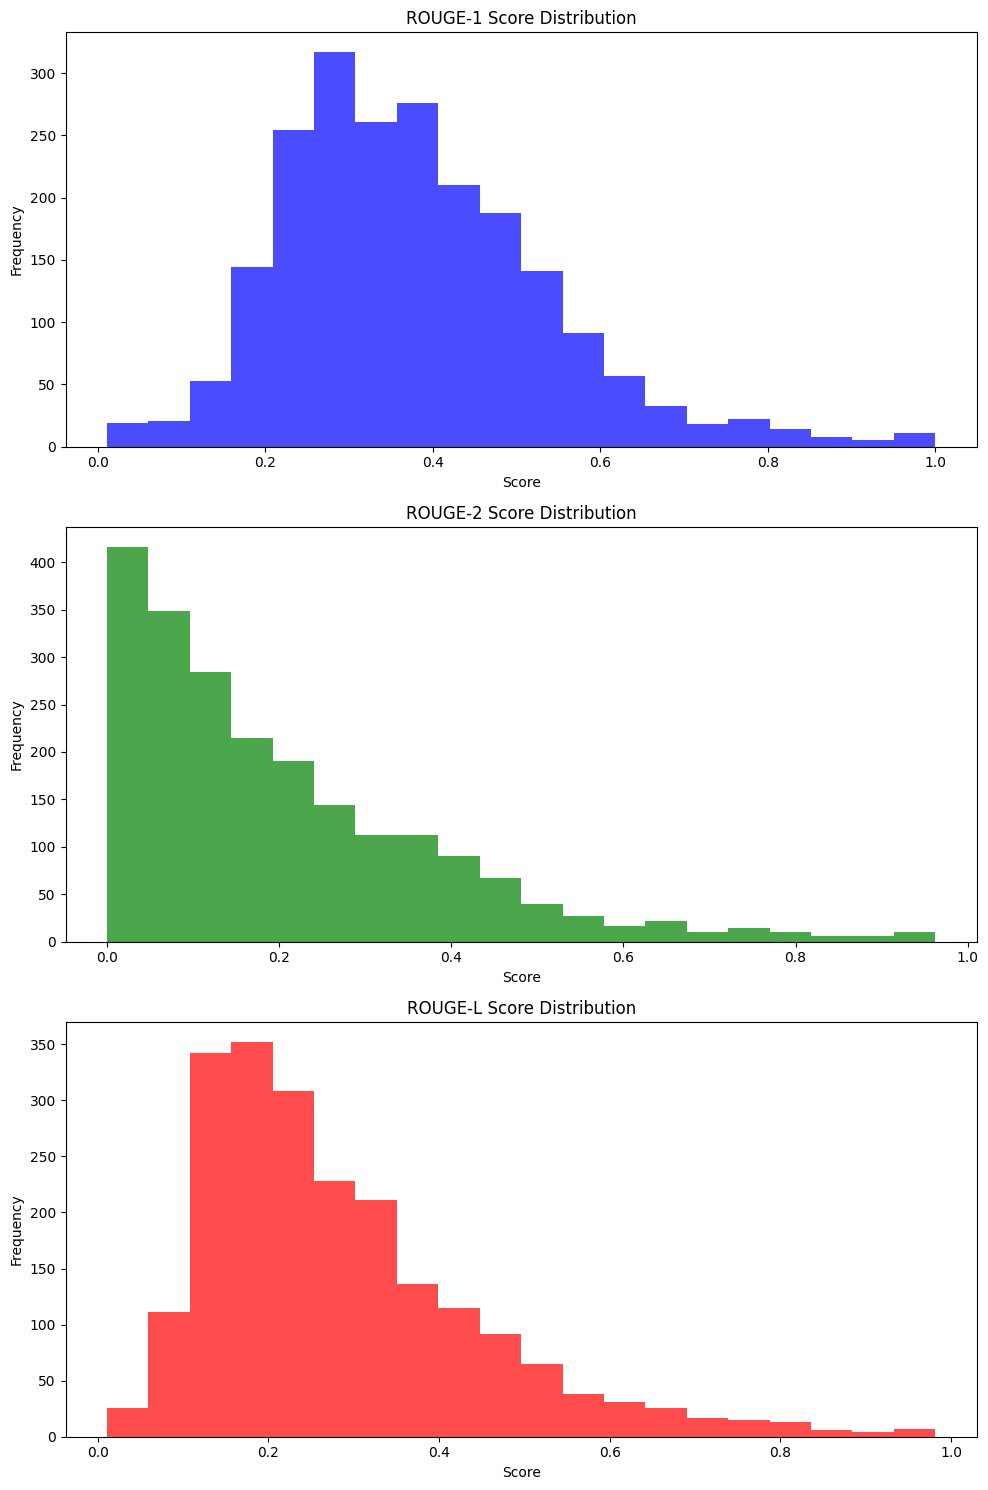

Average ROUGE-1 F-Measure: 0.378
Average ROUGE-2 F-Measure: 0.201
Average ROUGE-L F-Measure: 0.283
Overall BLEU Score: 0.151


In [34]:
import numpy as np

# Aggregating ROUGE scores
rouge1_f = [score['rouge1'].fmeasure for score in rouge_scores]
rouge2_f = [score['rouge2'].fmeasure for score in rouge_scores]
rougeL_f = [score['rougeL'].fmeasure for score in rouge_scores]

# Calculate average scores
average_rouge1 = np.mean(rouge1_f)
average_rouge2 = np.mean(rouge2_f)
average_rougeL = np.mean(rougeL_f)

# Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 15))
ax[0].hist(rouge1_f, bins=20, color='blue', alpha=0.7)
ax[0].set_title('ROUGE-1 Score Distribution')
ax[0].set_xlabel('Score')
ax[0].set_ylabel('Frequency')

ax[1].hist(rouge2_f, bins=20, color='green', alpha=0.7)
ax[1].set_title('ROUGE-2 Score Distribution')
ax[1].set_xlabel('Score')
ax[1].set_ylabel('Frequency')

ax[2].hist(rougeL_f, bins=20, color='red', alpha=0.7)
ax[2].set_title('ROUGE-L Score Distribution')
ax[2].set_xlabel('Score')
ax[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print average scores and BLEU score
print(f"Average ROUGE-1 F-Measure: {average_rouge1:.3f}")
print(f"Average ROUGE-2 F-Measure: {average_rouge2:.3f}")
print(f"Average ROUGE-L F-Measure: {average_rougeL:.3f}")
print(f"Overall BLEU Score: {bleu_score:.3f}")


In [25]:
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments

model = T5ForConditionalGeneration.from_pretrained("t5-base")
tokenizer = T5Tokenizer.from_pretrained("t5-base")

train_dataset = dataset['train'][0:1000]
validation_dataset = dataset['validation'][0:500]

training_args = TrainingArguments(
    output_dir="./results_t5_base",
    evaluation_strategy='epoch',
    learning_rate=3e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=3,
    fp16=True,
    logging_dir='./logs'
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=validation_dataset
)

trainer.train()

model_path = "./t5_model_base"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


OutOfMemoryError: CUDA out of memory. Tried to allocate 96.00 MiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 12.41 GiB is allocated by PyTorch, and 5.31 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Multilingual model

In [7]:
from datasets import load_dataset
dataset = load_dataset("readerbench/AlephNews")

print(dataset)

print(dataset['train'][0])


Repo card metadata block was not found. Setting CardData to empty.


DatasetDict({
    train: Dataset({
        features: ['title', 'summary', 'url', 'paragraphs'],
        num_rows: 38683
    })
    validation: Dataset({
        features: ['title', 'summary', 'url', 'paragraphs'],
        num_rows: 2036
    })
    test: Dataset({
        features: ['title', 'summary', 'url', 'paragraphs'],
        num_rows: 2143
    })
})
{'title': 'Ion Cristoiu: Drama din amor, mai tare decât adoptarea Constituţiei.', 'summary': ['Ion Cristoiu: În anii 1923-1924, numita Anny Bally din Brăila, "de o frumuseţe rară“, a încercat să se sinucidă din dragoste. În 8 noiembrie 1924, tot din amor, şi-a împuşcat iubitul, după care s-a împuşcat şi ea.', 'Ion Cristoiu: În tot acest timp, Adunarea Deputaţilor a votat o nouă Constituţie (în 26 noiembrie 1923), considerată "nulă" de către Opoziţie; Guvernul liberal Ionel Brătianu a adoptat Pachetul de legi economice, prin care se înfăptuia Programul Prin noi înşine!', 'Ion Cristoiu: Nici unul dintre aceste evenimente, rămase în Isto

In [8]:
from transformers import MT5ForConditionalGeneration, MT5Tokenizer

model_name = 'google/mt5-small'
tokenizer = MT5Tokenizer.from_pretrained(model_name)
model = MT5ForConditionalGeneration.from_pretrained(model_name)


In [9]:
import re

def clean_text(text):
    if not isinstance(text, str):
        text = ' ' if text is None else str(text)
    
    # Remove URLs
    text = re.sub(r'http[s]?://\S+', '', text)
    # Remove email addresses
    text = re.sub(r'\S+@\S+\.\S+', '', text)
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    # Normalize whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Remove boilerplate notes and specific patterns
    text = re.sub(r'NOTĂ:.*?\.ro\.', '', text)
    # Remove or substitute special characters/punctuation as needed
    text = re.sub(r'[^\w\s]', '', text)
    # Optional: Convert to lowercase
    text = text.lower()
    
    return text


In [10]:
def tokenize_function(examples):
    inputs = ["summarize: " + " ".join(paragraph) for paragraph in examples['paragraphs']]
    summaries = [" ".join(summary) for summary in examples['summary']]

    model_inputs = tokenizer(inputs, max_length=512, truncation=True, padding='max_length', return_tensors="pt")
    labels = tokenizer(summaries, max_length=150, truncation=True, padding='max_length', return_tensors="pt")

    model_inputs = {key: val.tolist() for key, val in model_inputs.items()}
    model_inputs["labels"] = labels["input_ids"].tolist()

    return model_inputs


In [11]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)

In [19]:
import torch

!set PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True

# Clear CUDA cache to free up memory
torch.cuda.empty_cache()


In [13]:
training_subset = tokenized_dataset['train'].select(range(1000))
validation_subset = tokenized_dataset['validation'].select(range(500))

In [20]:

from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, TrainerCallback



# Training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir='./resultsMT5_better',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=1,  # Further reduce if possible, depending on your model architecture
    gradient_accumulation_steps=8,  # Increase if reducing batch size to maintain effective batch size
    per_device_eval_batch_size=1,
    weight_decay=0.01,
    save_total_limit=3,
    num_train_epochs=10,
    logging_dir='./logs',
    logging_steps=10,
    fp16=True,  # Ensure that mixed precision is enabled

)

# Custom callback to monitor the loss
class LossDebugCallback(TrainerCallback):
    def on_log(self, args, state, control, logs=None, **kwargs):
        print(logs)
        if 'loss' in logs and logs['loss'] == 0:
            print("Warning: Zero loss encountered!")

# Initialize trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=training_subset,
    eval_dataset=validation_subset,
    tokenizer=tokenizer,
    compute_metrics=lambda eval_pred: {"loss": eval_pred.loss},
    callbacks=[LossDebugCallback()]
)

# Start training
trainer.train()

# Save the model and tokenizer
model_path = "./mt5_model_small_better"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)


  1%|          | 10/1250 [01:29<3:12:48,  9.33s/it]

                                                    


                                       
  1%|          | 10/1250 [01:29<3:12:48,  9.33s/it]



{'loss': 25878225.6, 'learning_rate': 2e-05, 'epoch': 0.08}
{'loss': 25878225.6, 'learning_rate': 2e-05, 'epoch': 0.08}


  2%|▏         | 20/1250 [03:03<3:14:15,  9.48s/it]

                                                    


                                       
  2%|▏         | 20/1250 [03:03<3:14:15,  9.48s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.16}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.16}


  2%|▏         | 30/1250 [04:36<3:08:27,  9.27s/it]

                                                    


                                       
  2%|▏         | 30/1250 [04:36<3:08:27,  9.27s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.24}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.24}


  3%|▎         | 40/1250 [06:09<3:07:33,  9.30s/it]

                                                    


                                       
  3%|▎         | 40/1250 [06:09<3:07:33,  9.30s/it]



{'loss': 238.7036, 'learning_rate': 2e-05, 'epoch': 0.32}
{'loss': 238.7036, 'learning_rate': 2e-05, 'epoch': 0.32}


  4%|▍         | 50/1250 [07:42<3:06:02,  9.30s/it]

                                                    


                                       
  4%|▍         | 50/1250 [07:42<3:06:02,  9.30s/it]



{'loss': 20.5324, 'learning_rate': 2e-05, 'epoch': 0.4}
{'loss': 20.5324, 'learning_rate': 2e-05, 'epoch': 0.4}


  5%|▍         | 60/1250 [09:15<3:03:55,  9.27s/it]

                                                    


                                       
  5%|▍         | 60/1250 [09:15<3:03:55,  9.27s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.48}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.48}


  6%|▌         | 70/1250 [10:47<3:02:48,  9.30s/it]

                                                    


                                       
  6%|▌         | 70/1250 [10:47<3:02:48,  9.30s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.56}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.56}


  6%|▋         | 80/1250 [12:20<3:00:36,  9.26s/it]

                                                    


                                       
  6%|▋         | 80/1250 [12:20<3:00:36,  9.26s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.64}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.64}


  7%|▋         | 90/1250 [13:53<2:59:18,  9.27s/it]

                                                    


                                       
  7%|▋         | 90/1250 [13:53<2:59:18,  9.27s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.72}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.72}


  8%|▊         | 100/1250 [15:25<2:57:27,  9.26s/it]

                                                    


                                       
  8%|▊         | 100/1250 [15:25<2:57:27,  9.26s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.8}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.8}


  9%|▉         | 110/1250 [16:58<2:56:05,  9.27s/it]

                                                    


                                       
  9%|▉         | 110/1250 [16:58<2:56:05,  9.27s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.88}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.88}


 10%|▉         | 120/1250 [18:31<2:54:41,  9.28s/it]

                                                    


                                       
 10%|▉         | 120/1250 [18:31<2:54:41,  9.28s/it]



{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.96}
{'loss': 0.0, 'learning_rate': 2e-05, 'epoch': 0.96}


 10%|█         | 125/1250 [19:17<2:53:30,  9.25s/it]

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.78 GiB. GPU 0 has a total capacity of 6.00 GiB of which 0 bytes is free. Of the allocated memory 7.33 GiB is allocated by PyTorch, and 1.62 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [9]:
def preprocess_test_data(text):
    # Join the list of paragraphs into a single string if text is a list
    if isinstance(text, list):
        text = " ".join(text)
    print("Preprocessed text:", text)  # Debug: Print to verify the processed text
    inputs = tokenizer("summarize: " + text, return_tensors="pt", max_length=512, truncation=True, padding='max_length')
    inputs = {key: val.to(model.device) for key, val in inputs.items()}
    return inputs


In [10]:
import torch

def generate_summary(test_data):
    model.eval()  # Set the model to eval mode
    with torch.no_grad():  # Disable gradient calculation for inference
        # Extract 'input_ids' and 'attention_mask', ensuring they are tensors and adding a batch dimension
        input_ids = torch.tensor(test_data['input_ids']).unsqueeze(0).to(model.device)
        attention_mask = torch.tensor(test_data['attention_mask']).unsqueeze(0).to(model.device)
        
        # Generate outputs using the model
        outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=150, num_beams=5, early_stopping=True)
        
        # Decode generated token IDs to a string summary
        summary = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return summary


In [11]:
test_text = tokenized_dataset['test'][0]

print("Original text:", test_text)

Original text: {'title': '"Boema" lui Puccini, pe timp de pandemie. Primul spectacol de operă live drive-in din Europa.', 'summary': ['Pandemia a dus anul ăsta la o premieră în lumea spectacolelor: opera drive-in.', '"Boema" lui Puccini s-a jucat pentru prima dată într-o parcare şi a fost urmărită din maşini.', 'Opera de la Bucureşti şi-a redeschis porţile şi te aşteaptă la spectacole.'], 'url': 'https://alephnews.ro/entertainment/boema-lui-puccini-pe-timp-de-pandemie-primul-spectacol-de-opera-live-drive-in-din-europa/', 'paragraphs': ['Englezilor le place să facă lucrurile altfel. Și încearcă să nu te dezamăgească niciodată. Primul spectacol de operă live drive-in din Europa a avut loc în weekend la Londra.S-a jucat "Boema" lui Puccini, în parcarea de la Alexandra Palace.Sala de evenimente, faimoasă în oraş, e închisă încă de la începutul pandemiei.Așa că spectacolul a fost adaptat vremurilor. Spectatorii au stat în mașini și au fost serviţi cu îngheţată, ciocolată şi băuturi.Şi-au re

In [12]:
summary = generate_summary(test_text)

print("Generated summary:", summary)

NameError: name 'generate_summary' is not defined